# ___Support Vector Machine for Breast Cancer___
---
---

## Tasks  
1. Import and explore the dataset. Recall the load_breast_cancer() method will return an object that contains the data in .data, the labels in .target, and the column names in .feature_names attributes.
2. Build a Correlation Heatmap using Seaborn to check for each feature's correlation with the labels.
3. Build a second Correlation Heatmap using Seaborn to check for mutlicollinearity between features.
4. Scale and transform the data using a StandardScaler() object and any appropriate methods it contains.
5. Split the newly scaled data into training and testing sets using train_test_split().
6. Create an SVC() object, which can be found in sklearn.svm
7. Fit the model to the scaled data.
8. Use your validation data to check the accuracy metrics for your model.


#### **Stretch Challenge:**

Try different parameters such as different kernels to see how it affects the overall performance of the model. For a full list of the tunable parameters you can use with an SVC, see the documentation on sklearn.org.


In [28]:
import pandas as pd
import numpy as np
import seaborn as sns
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
from sklearn.pipeline import make_pipeline
from sklearn.svm import SVC

## # 1
## Load Data

In [6]:
breast_cancer_data = load_breast_cancer()

print(breast_cancer_data.data, '\n')
print(breast_cancer_data.data.shape, '\n')

bc = pd.DataFrame(breast_cancer_data.data)

bc.columns = breast_cancer_data.feature_names
bc['PRICE'] = breast_cancer_data.target

print(bc.head())

[[1.799e+01 1.038e+01 1.228e+02 ... 2.654e-01 4.601e-01 1.189e-01]
 [2.057e+01 1.777e+01 1.329e+02 ... 1.860e-01 2.750e-01 8.902e-02]
 [1.969e+01 2.125e+01 1.300e+02 ... 2.430e-01 3.613e-01 8.758e-02]
 ...
 [1.660e+01 2.808e+01 1.083e+02 ... 1.418e-01 2.218e-01 7.820e-02]
 [2.060e+01 2.933e+01 1.401e+02 ... 2.650e-01 4.087e-01 1.240e-01]
 [7.760e+00 2.454e+01 4.792e+01 ... 0.000e+00 2.871e-01 7.039e-02]] 

(569, 30) 

   mean radius  mean texture  mean perimeter  mean area  mean smoothness  \
0        17.99         10.38          122.80     1001.0          0.11840   
1        20.57         17.77          132.90     1326.0          0.08474   
2        19.69         21.25          130.00     1203.0          0.10960   
3        11.42         20.38           77.58      386.1          0.14250   
4        20.29         14.34          135.10     1297.0          0.10030   

   mean compactness  mean concavity  mean concave points  mean symmetry  \
0           0.27760          0.3001           

## Exploratory data

In [7]:
print("Dataset described: \n", bc.describe())
print('\n\n\n')
print("Dataset types: \n", bc.dtypes)
print('\n\n\n')
print("Dataset info: \n", bc.info)

Dataset described: 
        mean radius  mean texture  mean perimeter    mean area  \
count   569.000000    569.000000      569.000000   569.000000   
mean     14.127292     19.289649       91.969033   654.889104   
std       3.524049      4.301036       24.298981   351.914129   
min       6.981000      9.710000       43.790000   143.500000   
25%      11.700000     16.170000       75.170000   420.300000   
50%      13.370000     18.840000       86.240000   551.100000   
75%      15.780000     21.800000      104.100000   782.700000   
max      28.110000     39.280000      188.500000  2501.000000   

       mean smoothness  mean compactness  mean concavity  mean concave points  \
count       569.000000        569.000000      569.000000           569.000000   
mean          0.096360          0.104341        0.088799             0.048919   
std           0.014064          0.052813        0.079720             0.038803   
min           0.052630          0.019380        0.000000             

## # 2
## Correlation Map #1

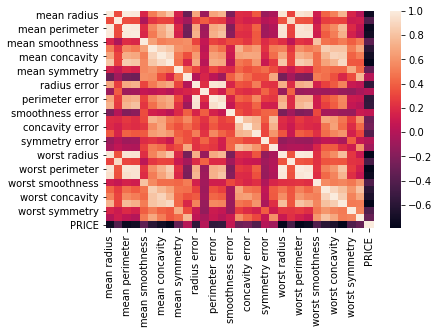

In [10]:
bcCorr = bc.corr()
sns.heatmap(bcCorr)

## # 3  
## Correlation Heatmap #2

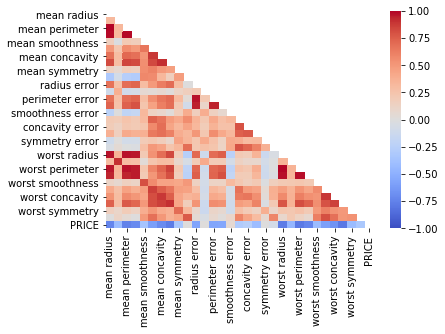

In [27]:
matrix = np.triu(bcCorr.corr())
sns.heatmap(bcCorr, 
            vmin=-1, 
            vmax=1, 
            center= 0, 
            cmap= 'coolwarm', 
            mask=matrix
           )


## # 4
## StandardScalar

In [37]:
std = StandardScaler()
bc_std = std.fit_transform(bc)
print("Value distribution after std: ")
print(list(bc_std[0]))

Value distribution after std: 
[1.0970639814699839, -2.073335014697587, 1.2699336881399386, 0.9843749048031144, 1.5684663292434209, 3.2835146709868286, 2.652873983743169, 2.5324752164032427, 2.2175150059646422, 2.255746885296271, 2.489733926737622, -0.565265059068463, 2.833030865855181, 2.4875775569611034, -0.21400164666895338, 1.3168615683959486, 0.7240261580803589, 0.6608199414286064, 1.1487566671861764, 0.907083080997336, 1.8866896251792775, -1.3592934737640852, 2.303600623622561, 2.0012374893299203, 1.3076862710715433, 2.616665023512604, 2.1095263465722556, 2.29607612756179, 2.750622244124958, 1.937014612378176, -1.2976757160981875]


## # 5 - 7
## Train_test_split, SVM, and Fit the model

In [42]:
 def data_model(data, target):  #x,y
    X_train, X_test, y_train, y_test = train_test_split(data, target, test_size=0.25, random_state=0)
    pipeline = make_pipeline(SVC(gamma='scale'))
    model = pipeline.fit(X_train, y_train)
    return (X_test, y_test, model)

## # 8
## Model Evaluation

In [45]:
print("***  Std Model Evalution  ***\n")
X_test, y_test, model = data_model(bc, bc['PRICE'])
prediction = model.predict(X_test)
print("MSE: {}".format(mean_squared_error(y_test, prediction)))
print("R Squared: {}".format(r2_score(y_test, prediction)))

***  Std Model Evalution  ***

MSE: 0.06293706293706294
R Squared: 0.730188679245283


# ___Stretch Challenge___
# ____SVM kernel____
---
---
![img](kernel-svc.png)

## Kernel : 'rbf'   (default)

In [56]:
 def data_model(data, target):  #x,y
    X_train, X_test, y_train, y_test = train_test_split(data, target, test_size=0.25, random_state=0)
    pipeline = make_pipeline(SVC(gamma='scale'))
    model = pipeline.fit(X_train, y_train)
    return (X_test, y_test, model)

print("***  Std Model Evalution ***\n")
X_test, y_test, model = data_model(bc, bc['PRICE'])
prediction = model.predict(X_test)
print("MSE: {}".format(mean_squared_error(y_test, prediction)))
print("R Squared: {}".format(r2_score(y_test, prediction)))

***  Std Model Evalution ***

MSE: 0.06293706293706294
R Squared: 0.730188679245283


## Kernel : 'linear'

In [52]:
 def data_model_lin(data, target):  #x,y
    X_train, X_test, y_train, y_test = train_test_split(data, target, test_size=0.25, random_state=0)
    pipeline = make_pipeline(SVC(gamma='scale', kernel='linear'))
    model = pipeline.fit(X_train, y_train)
    return (X_test, y_test, model)

print("***  Std Model Evalution with (kernel = 'linear') ***\n")
X_test, y_test, model = data_model_lin(bc, bc['PRICE'])
prediction = model.predict(X_test)
print("MSE: {}".format(mean_squared_error(y_test, prediction)))
print("R Squared: {}".format(r2_score(y_test, prediction)))

***  Std Model Evalution with (kernel = 'linear') ***

MSE: 0.0
R Squared: 1.0


## Kernel : 'poly'

In [48]:
 def data_model_poly(data, target):  #x,y
    X_train, X_test, y_train, y_test = train_test_split(data, target, test_size=0.25, random_state=0)
    pipeline = make_pipeline(SVC(gamma='scale', kernel='poly'))
    model = pipeline.fit(X_train, y_train)
    return (X_test, y_test, model)

print("***  Std Model Evalution with (kernel = 'poly') ***\n")
X_test, y_test, model = data_model_poly(bc, bc['PRICE'])
prediction = model.predict(X_test)
print("MSE: {}".format(mean_squared_error(y_test, prediction)))
print("R Squared: {}".format(r2_score(y_test, prediction)))

***  Std Model Evalution with (kernel = 'poly') ***

MSE: 0.07692307692307693
R Squared: 0.6702306079664571


## Kernel : 'sigmoid'

In [49]:
 def data_model_sig(data, target):  #x,y
    X_train, X_test, y_train, y_test = train_test_split(data, target, test_size=0.25, random_state=0)
    pipeline = make_pipeline(SVC(gamma='scale', kernel='sigmoid'))
    model = pipeline.fit(X_train, y_train)
    return (X_test, y_test, model)

print("***  Std Model Evalution with (kernel = 'sigmoid') ***\n")
X_test, y_test, model = data_model_sig(bc, bc['PRICE'])
prediction = model.predict(X_test)
print("MSE: {}".format(mean_squared_error(y_test, prediction)))
print("R Squared: {}".format(r2_score(y_test, prediction)))

***  Std Model Evalution with (kernel = 'sigmoid') ***

MSE: 0.5454545454545454
R Squared: -1.338364779874214
